In [1]:
#import tensorflow as tf
import numpy as np
import pandas as pd
import scipy
from pandas.tools.plotting import scatter_matrix
from pandas import DataFrame

import os
import matplotlib.pyplot as plt
#import matplotlib as plt
#import seaborn as sns

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions

import mglearn
import tflearn
from tflearn.data_utils import load_image

np.__version__
pd.__version__

SCRIPT_PATH = '/Users/cesare.chung/int/01_CODE_UNET/NEW/dataset/'

In [2]:
#
imgs = []
num = 1
for i in range(1, num + 1):
    img = load_image("%s/train2/%s.jpg" % (SCRIPT_PATH, i))
#    img = img.resize((224,224))
#    img = img.resize((270,506))
    img = img.resize((320,550))
    img_arr = np.asarray(img)
    imgs.append(img_arr)
#
imgs = np.array(imgs)

In [3]:
print ("Shape of imgs", imgs.shape)

Shape of imgs (1, 550, 320, 4)


Mura Images Shape = (550, 320, 4)
Mura Images Dim.  = 3
Mura Images Type  = uint8


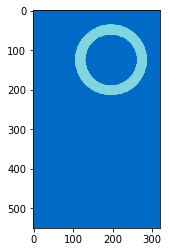

In [4]:
#################################
# Show pictures / shape         #
#################################
for i in range(num):
    input_image = imgs[i]
    print ('Mura Images Shape = {}'.format(input_image.shape))
    print ('Mura Images Dim.  = {}'.format(input_image.ndim))
    print ('Mura Images Type  = {}'.format(input_image.dtype))
    plt.imshow(imgs[i])
    plt.show()
#

imgs = imgs / 255
#imgs = imgs.reshape(1,224, 224,4)
imgs = imgs.transpose(0,3,1,2)

In [5]:
print ("Shape of img_arr", img_arr.shape)
print ("Shape of imgs", imgs.shape)

Shape of img_arr (550, 320, 4)
Shape of imgs (1, 4, 550, 320)


In [6]:
Image0 = imgs[0]

print ("Shape of Image0", Image0.shape)

Shape of Image0 (4, 550, 320)


In [7]:
Image0 = imgs[0,0]    # Set the inputs

print ("Shape of Image0", Image0.shape)

Shape of Image0 (550, 320)


Images Data Points = 176000
xmax = 550
ymax = 320


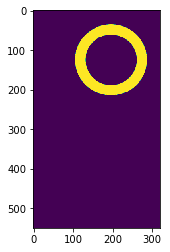

In [8]:
Size0 = Image0.shape[0] * Image0.shape[1]
print('Images Data Points = {}'.format(Size0))

Image0.size
xmax = Image0.shape[0]
ymax = Image0.shape[1]

print('xmax = {}'.format(xmax))
print('ymax = {}'.format(ymax))

plt.imshow(Image0)
plt.show()

In [9]:
#
X0 = np.zeros((Size0,2))
X0 = np.zeros((Image0.size,2))
Y0 = np.zeros(Image0.size)
#Y0 = Image0.reshape(Size0, 1)

print ("Shape of X0 : ", X0.shape)
print ("Shape of Y0 : ", Y0.shape)

avg=np.mean(Image0)
avg

Shape of X0 :  (176000, 2)
Shape of Y0 :  (176000,)


0.036311786987522285

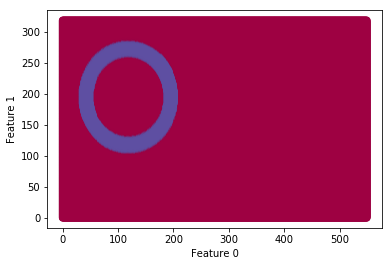

In [10]:
#
for i in range(Image0.shape[0]):
    for j in range(Image0.shape[1]):
        X0[j+i*320]=[i,j]
        if Image0[i,j]>avg:
            Y0[j+i*320]=1
        else:
            Y0[j+i*320]=0
#
Y0=Y0.astype(np.integer)
#
plt.scatter(X0[:,0], X0[:,1], s=40, c=Y0, cmap=plt.cm.Spectral)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [11]:
df_Y0 = pd.DataFrame(Y0)

df_Y0[0].values

Counts0 = df_Y0[0].value_counts()
print(Counts0)
#

0    162977
1     13023
Name: 0, dtype: int64


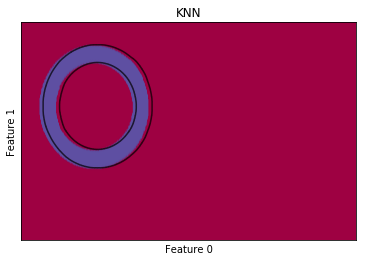

In [12]:
#
############################# Modeling 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
############################# Modeling 
#

######################
# KNN                #
######################

knn = KNeighborsClassifier(n_neighbors= 100).fit(X0, Y0)

mglearn.plots.plot_2d_separator(knn, X0, fill=False, eps=0.5,alpha=.7)

plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0, cmap=plt.cm.Spectral)
plt.title("KNN")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

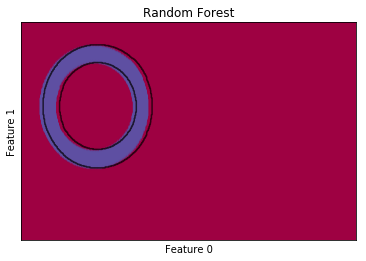

In [13]:
######################
# Random Forest      #
######################

forest = RandomForestClassifier(n_estimators=5,  random_state=2).fit(X0, Y0)
#
forest = RandomForestClassifier(n_estimators=1000,random_state=0, n_jobs=-1).fit(X0, Y0)

mglearn.plots.plot_2d_separator(forest, X0, fill=False, eps=0.5,alpha=.7)

plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0, cmap=plt.cm.Spectral)
plt.title("Random Forest")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
#
plt.show()

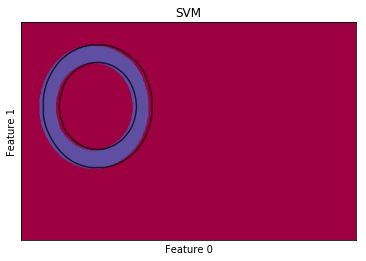

In [14]:
######################
# SVM                #
######################

svm = SVC(kernel='rbf', C=3,  gamma=0.01).fit(X0, Y0)

mglearn.plots.plot_2d_separator(svm, X0, fill=False, eps=0.5,alpha=.7)

plt.scatter(X0[:, 0], X0[:, 1], s=40, c=Y0, cmap=plt.cm.Spectral)
plt.title("SVM")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()